# Tugas 6 - Support Vector Machine

<b>IDENTITAS</b>

NIM: 2041720006

Nama: Iftitah Hidayati

Kelas: TI-3H

#Melakukan Klasifikasi Data Gaji

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
gaji = pd.read_csv('/content/drive/MyDrive/Data/PembelajaranMesin/P7/gaji.csv')
gaji.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
gaji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Posisi  10 non-null     object
 1   Level   10 non-null     int64 
 2   Gaji    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
def Klasifikasi(row):  
    if row['Gaji'] > 80000 :
        return 1
    else:
        return 0

gaji['Klasifikasi'] = gaji.apply(lambda row: Klasifikasi(row), axis=1)

print(gaji)

              Posisi  Level     Gaji  Klasifikasi
0   Business Analyst      1    45000            0
1  Junior Consultant      2    50000            0
2  Senior Consultant      3    60000            0
3            Manager      4    80000            0
4    Country Manager      5   110000            1
5     Region Manager      6   150000            1
6            Partner      7   200000            1
7     Senior Partner      8   300000            1
8            C-level      9   500000            1
9                CEO     10  1000000            1


#**Prediksi Table**

In [14]:
x = gaji[['Level','Gaji']]
y = gaji['Klasifikasi']

In [15]:
from sklearn.model_selection import train_test_split

# membagi dataset gaji menjadi tranining dan testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
from sklearn import svm

from sklearn.svm import SVC
from sklearn.metrics import classification_report

#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



#Confusion Matrix

Text(69.0, 0.5, 'Truth')

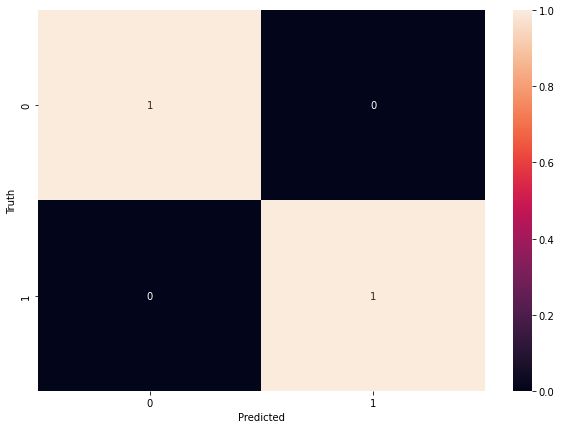

In [17]:
from sklearn.metrics import confusion_matrix
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')